In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Understanding data

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [34]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign     float64
pdays          int64
previous     float64
poutcome      object
deposit       object
dtype: object

### Checking Missing Values

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

- No missing value

### Outliers

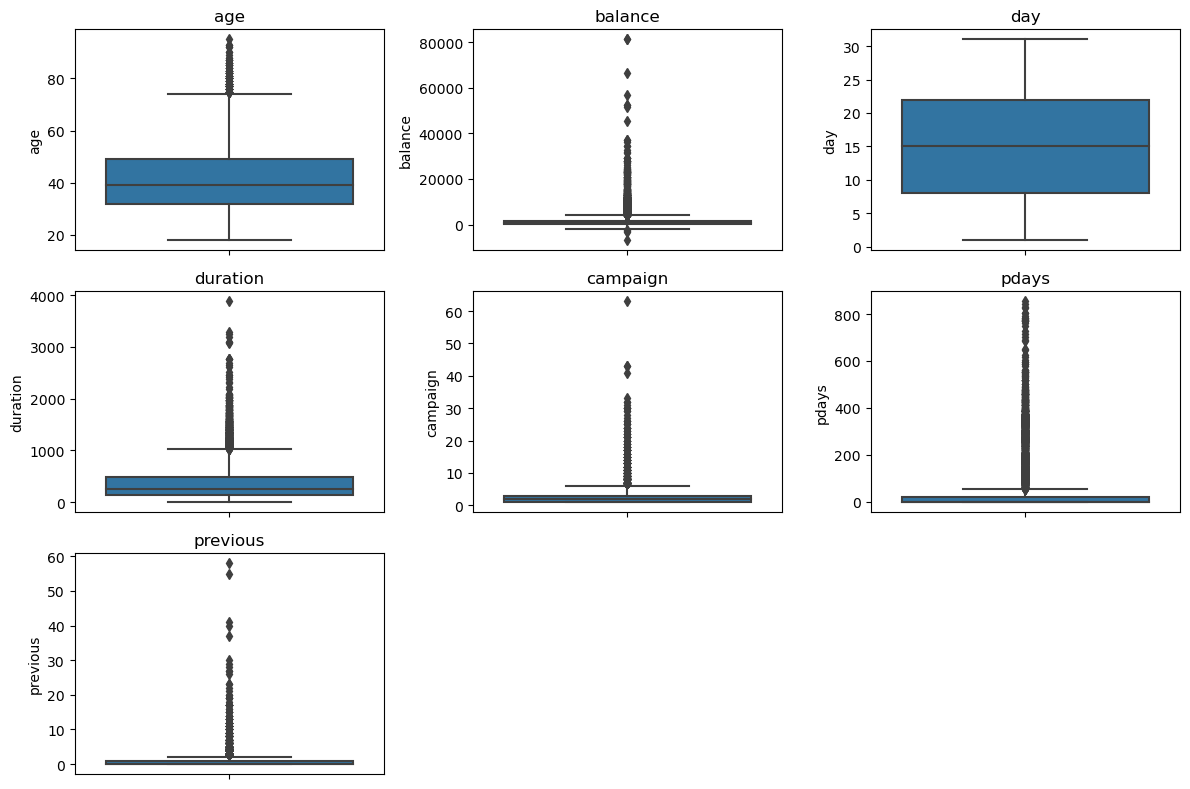

In [8]:
numerical_col = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col) // 3 + 1, 3, i)  # Adjust rows/columns dynamically
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

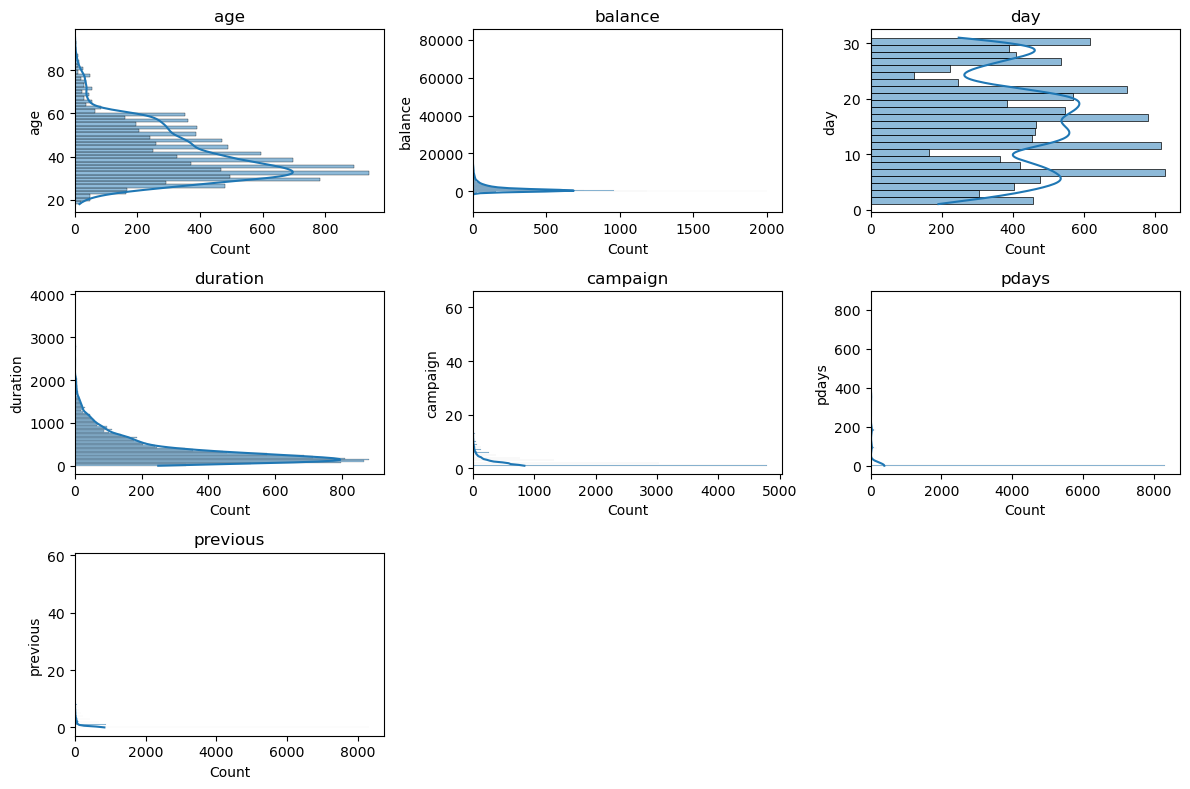

In [9]:
numerical_col = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col) // 3 + 1, 3, i)  # Adjust rows/columns dynamically
    sns.histplot(y=df[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
df['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

In [11]:
df['age'].max()

95

In [12]:
df['age'].min()

18

In [13]:
df['age'].value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

- Realistically possible no outliers in age 

In [14]:
df['balance'].max()

81204

In [15]:
df['balance'].min()

-6847

In [16]:
df['balance'].value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

- Balance can be positive and negative both

In [17]:
df['duration'].max() , df['duration'].min() , df['duration'].mean()

(3881, 2, 371.99381831213043)

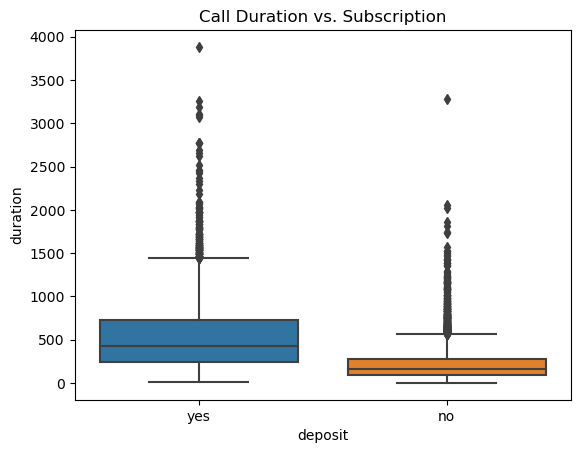

In [18]:
sns.boxplot(x=df['deposit'], y=df['duration'])
plt.title('Call Duration vs. Subscription')
plt.show()

- Longer call durations may indicate higher customer interest.

In [19]:
df['campaign'].max() , df['campaign'].min() , df['campaign'].mean()

(63, 1, 2.508421429851281)

- 63 represents large number of contacts made can be outliers

##### Capping --> Winsorization

In [20]:
upper_bound = df['campaign'].quantile(0.9)
lower_bound = df['campaign'].quantile(0.01)

In [21]:
upper_bound , lower_bound

(5.0, 1.0)

In [22]:
df['campaign'] = np.where(df['campaign']>upper_bound,upper_bound,df['campaign'])

In [23]:
df['campaign'].max()

5.0

In [24]:
df['pdays'].max() , df['pdays'].min()

(854, -1)

- 854: Customer contacted 854 days before
- -1: Customer never contacted

In [25]:
df['previous'].max() , df['previous'].min()

(58, 0)

In [26]:
df['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

In [27]:
upper_bound = df['previous'].quantile(0.9)
lower_bound = df['previous'].quantile(0.01)

In [29]:
upper_bound,lower_bound

(3.0, 0.0)

In [30]:
df['previous'] = np.where(df['previous']>upper_bound,upper_bound,df['previous'])

In [31]:
df['previous'].max()

3.0

### EDA

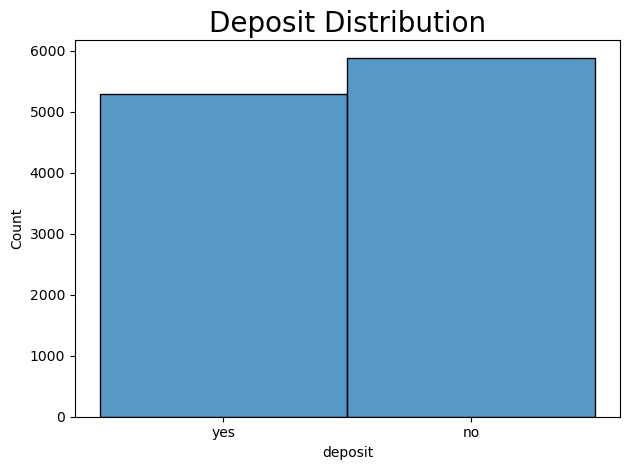

In [33]:
sns.histplot(data=df,x='deposit')
plt.title('Deposit Distribution',size=20)

plt.tight_layout()
plt.show()

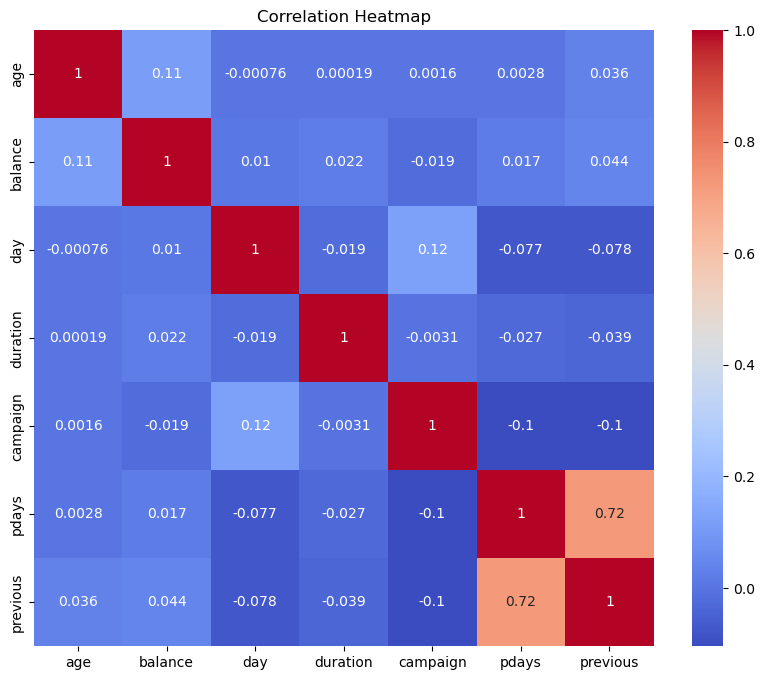

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

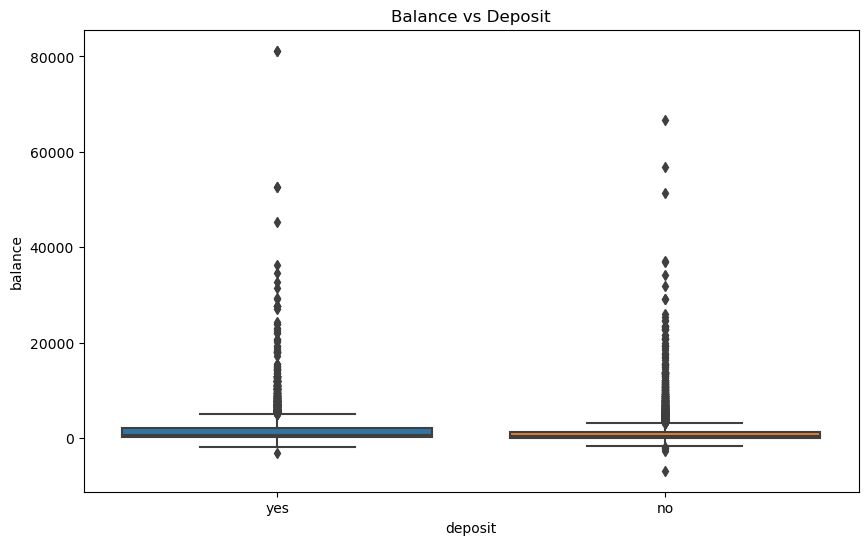

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['deposit'], y=df['balance'])
plt.title('Balance vs Deposit')
plt.show()

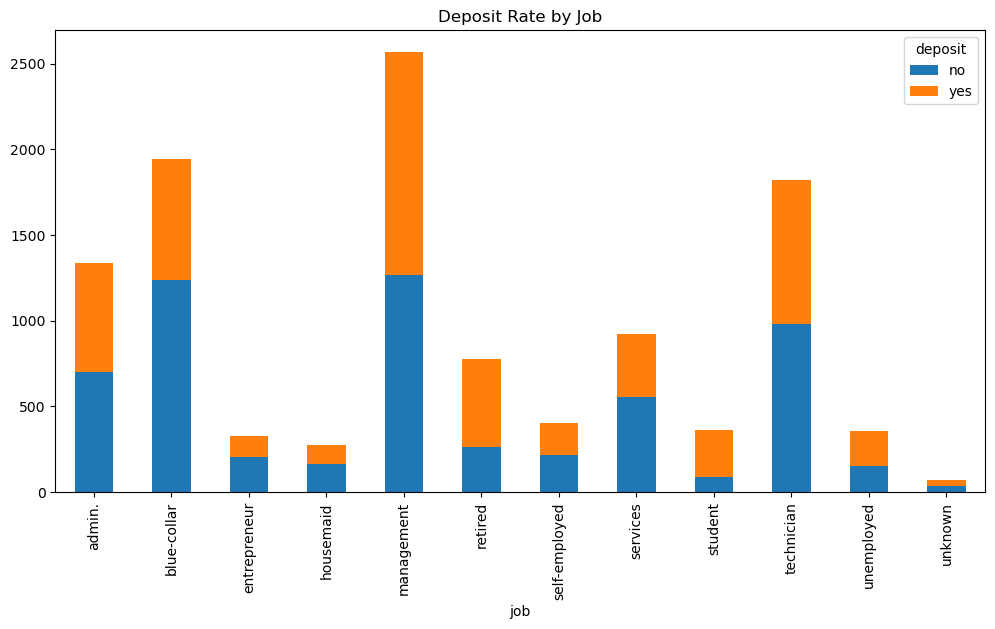

In [39]:
pd.crosstab(df['job'], df['deposit']).plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Deposit Rate by Job")
plt.show()

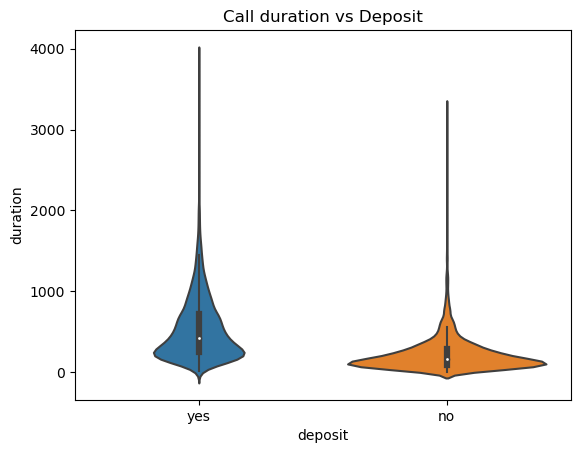

In [40]:
sns.violinplot(x=df['deposit'],y=df['duration'])
plt.title('Call duration vs Deposit')
plt.show()